In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O ./sarcasm.json

--2020-09-22 19:52:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 142.250.73.208, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘./sarcasm.json’

./sarcasm.json      100%[===================>]   5.38M  11.4MB/s    in 0.5s    

2020-09-22 19:52:07 (11.4 MB/s) - ‘./sarcasm.json’ saved [5643545/5643545]



In [4]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [8]:
training_sentences = sentences[:training_size]
training_labels = labels[:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                       padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [23]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs,
                   validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.5503 - accuracy: 0.7248 - val_loss: 0.3934 - val_accuracy: 0.8359
Epoch 2/30
625/625 - 1s - loss: 0.3079 - accuracy: 0.8781 - val_loss: 0.3524 - val_accuracy: 0.8435
Epoch 3/30
625/625 - 1s - loss: 0.2321 - accuracy: 0.9099 - val_loss: 0.3460 - val_accuracy: 0.8553
Epoch 4/30
625/625 - 1s - loss: 0.1876 - accuracy: 0.9277 - val_loss: 0.3696 - val_accuracy: 0.8508
Epoch 5/30
625/625 - 1s - loss: 0.1543 - accuracy: 0.9439 - val_loss: 0.3912 - val_accuracy: 0.8530
Epoch 6/30
625/625 - 1s - loss: 0.1312 - accuracy: 0.9527 - val_loss: 0.4278 - val_accuracy: 0.8459
Epoch 7/30
625/625 - 1s - loss: 0.1114 - accuracy: 0.9625 - val_loss: 0.4708 - val_accuracy: 0.8413
Epoch 8/30
625/625 - 1s - loss: 0.0965 - accuracy: 0.9679 - val_loss: 0.5238 - val_accuracy: 0.8353
Epoch 9/30
625/625 - 1s - loss: 0.0833 - accuracy: 0.9718 - val_loss: 0.5621 - val_accuracy: 0.8366
Epoch 10/30
625/625 - 1s - loss: 0.0720 - accuracy: 0.9766 - val_loss: 0.6175 - val_accuracy: 0.8272

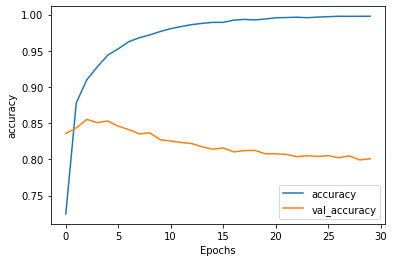

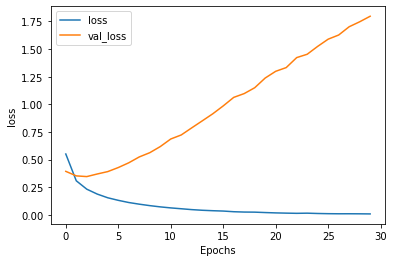

In [28]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [86]:
# Hyperparameter tunning

vocab_size = 500 # (was 10000)
embedding_dim = 16 # (was 16)
max_length = 16  # (was 32)
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [87]:
training_sentences = sentences[:training_size]
training_labels = labels[:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [88]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                       padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [89]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 16, 16)            8000      
_________________________________________________________________
global_average_pooling1d_11  (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


In [91]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs,
                   validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.5431 - accuracy: 0.7125 - val_loss: 0.4386 - val_accuracy: 0.7900
Epoch 2/30
625/625 - 1s - loss: 0.4193 - accuracy: 0.8009 - val_loss: 0.4311 - val_accuracy: 0.7946
Epoch 3/30
625/625 - 1s - loss: 0.4105 - accuracy: 0.8052 - val_loss: 0.4304 - val_accuracy: 0.7930
Epoch 4/30
625/625 - 1s - loss: 0.4068 - accuracy: 0.8066 - val_loss: 0.4311 - val_accuracy: 0.7891
Epoch 5/30
625/625 - 1s - loss: 0.4063 - accuracy: 0.8067 - val_loss: 0.4313 - val_accuracy: 0.7918
Epoch 6/30
625/625 - 1s - loss: 0.4051 - accuracy: 0.8097 - val_loss: 0.4309 - val_accuracy: 0.7925
Epoch 7/30
625/625 - 1s - loss: 0.4043 - accuracy: 0.8080 - val_loss: 0.4344 - val_accuracy: 0.7864
Epoch 8/30
625/625 - 1s - loss: 0.4040 - accuracy: 0.8084 - val_loss: 0.4307 - val_accuracy: 0.7919
Epoch 9/30
625/625 - 1s - loss: 0.4020 - accuracy: 0.8112 - val_loss: 0.4328 - val_accuracy: 0.7879
Epoch 10/30
625/625 - 1s - loss: 0.3995 - accuracy: 0.8102 - val_loss: 0.4294 - val_accuracy: 0.7937

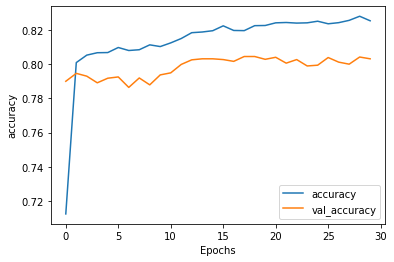

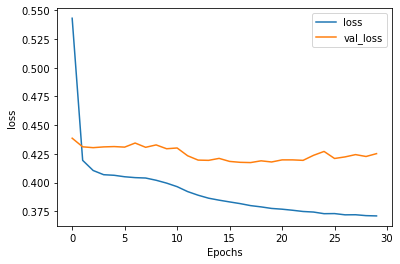

In [92]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")